# Importacion de librerias y carga de datos

In [ ]:
import sklearn
#Importacion de librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px
import plotly.graph_objects as go 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
plt.rcParams["image.cmap"] = "bwr"
plt.rcParams["savefig.bbox"] = "tight"
style.use("ggplot") or plt.style.use("ggplot")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importar archivo desde drive
url='https://drive.google.com/file/d/1_pLgrGHxajA0645dUjNsQS_nBiVrHgVW/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
datadrive = pd.read_csv(dwn_url, sep =";")
data = datadrive.drop(["ID","b","e","DR"], axis = 1)

# Matriz de correlacion

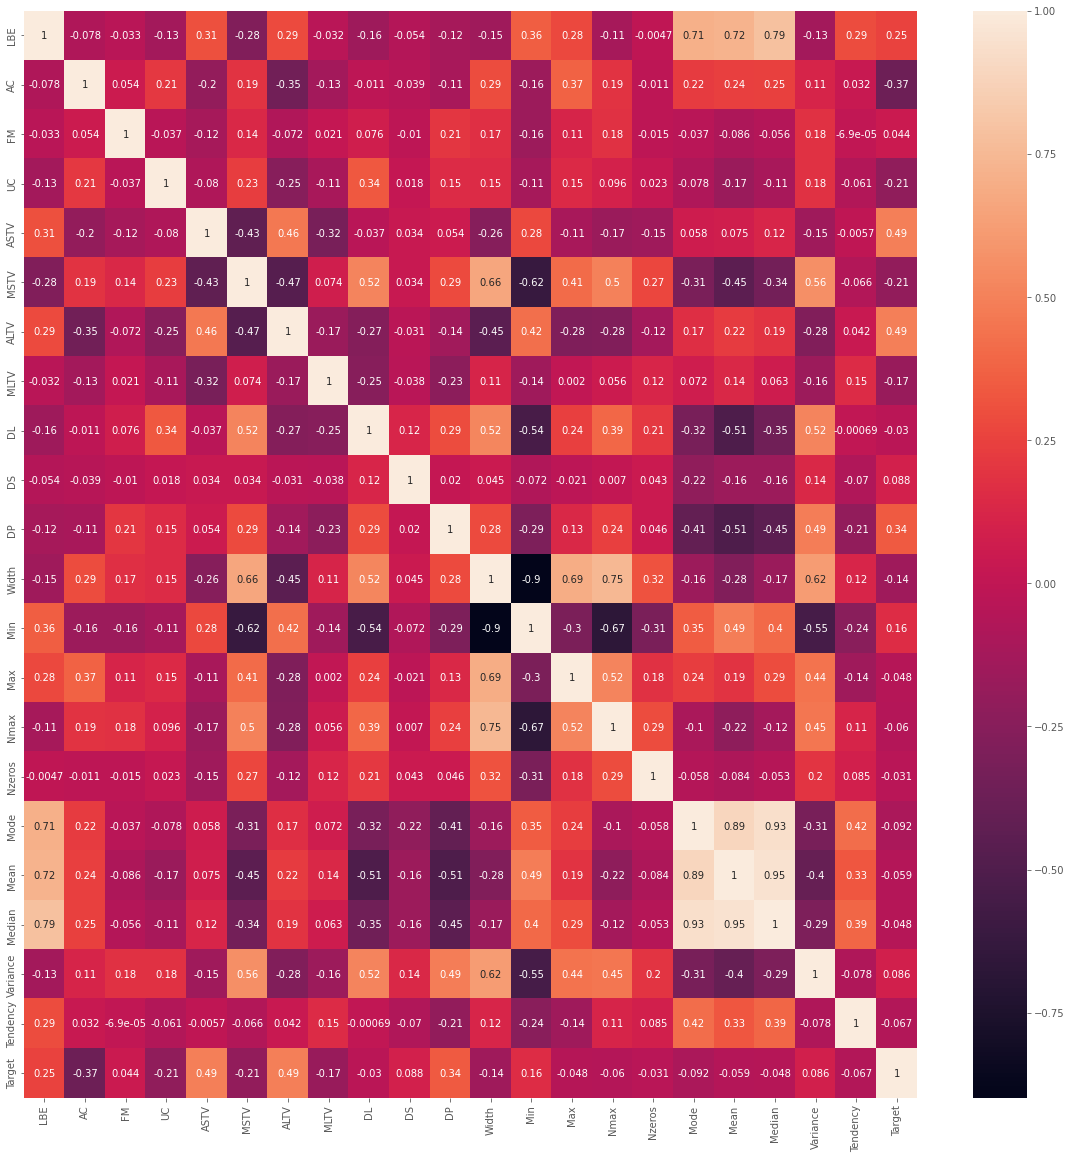

In [ ]:
plt.figure(figsize=(20,20))
corr = data.corr()
# cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr,annot=True)

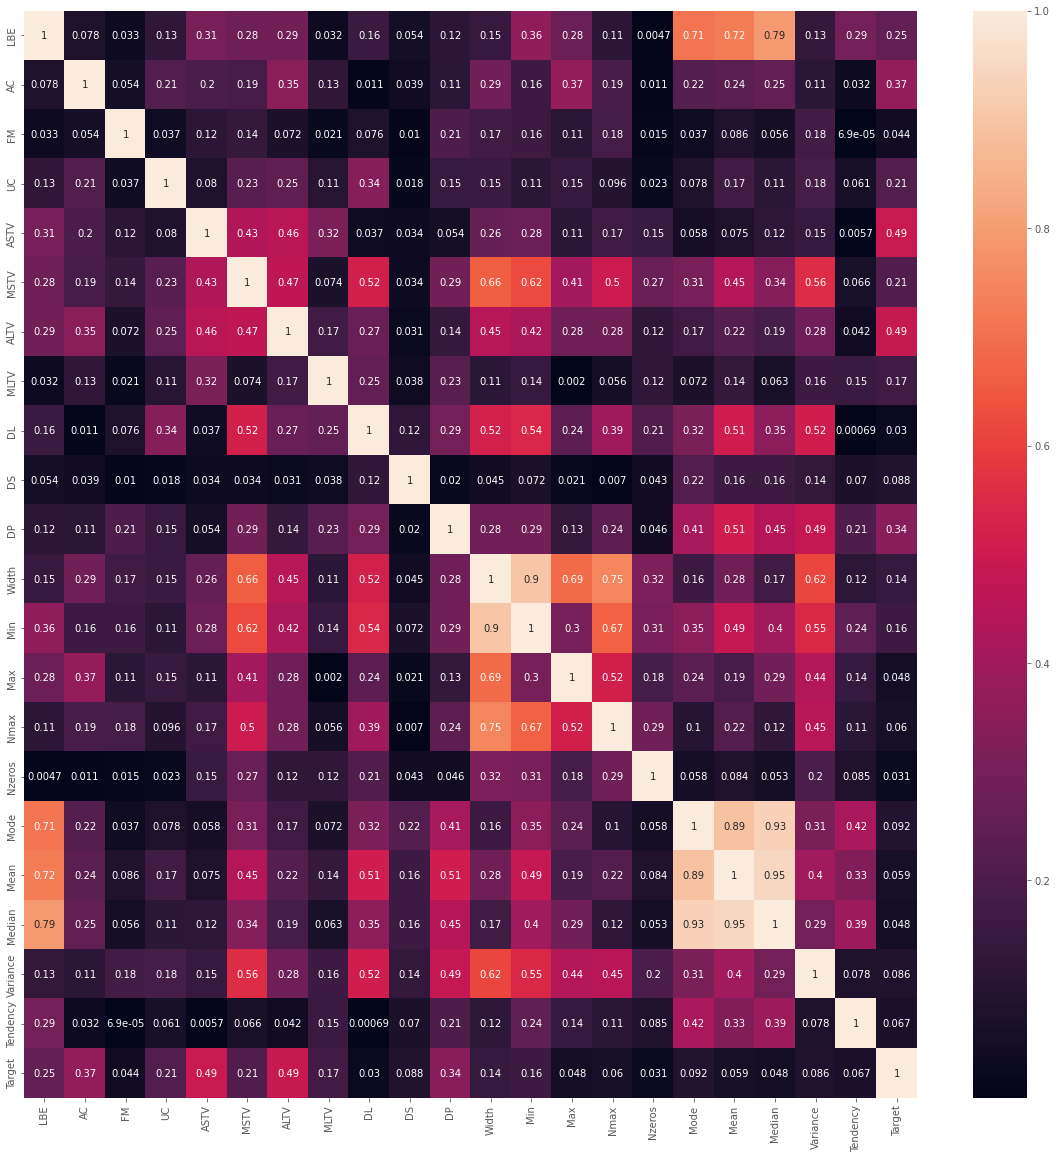

In [ ]:
# Mapa con valor absoluto
plt.figure(figsize=(20,20))
corr = data.corr()
# cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr.abs(),annot=True)

In [ ]:
# Se ordenan las variables de acuerdo a su correlacion con price
Target = data.corr().abs()
Target = Target.loc[:,["Target"]]
Target = Target.sort_values(ascending=False, by= "Target")
Tlist = Target.index.tolist()
print(Tlist)

['Target', 'ASTV', 'ALTV', 'AC', 'DP', 'LBE', 'UC', 'MSTV', 'MLTV', 'Min', 'Width', 'Mode', 'DS', 'Variance', 'Tendency', 'Nmax', 'Mean', 'Max', 'Median', 'FM', 'Nzeros', 'DL']


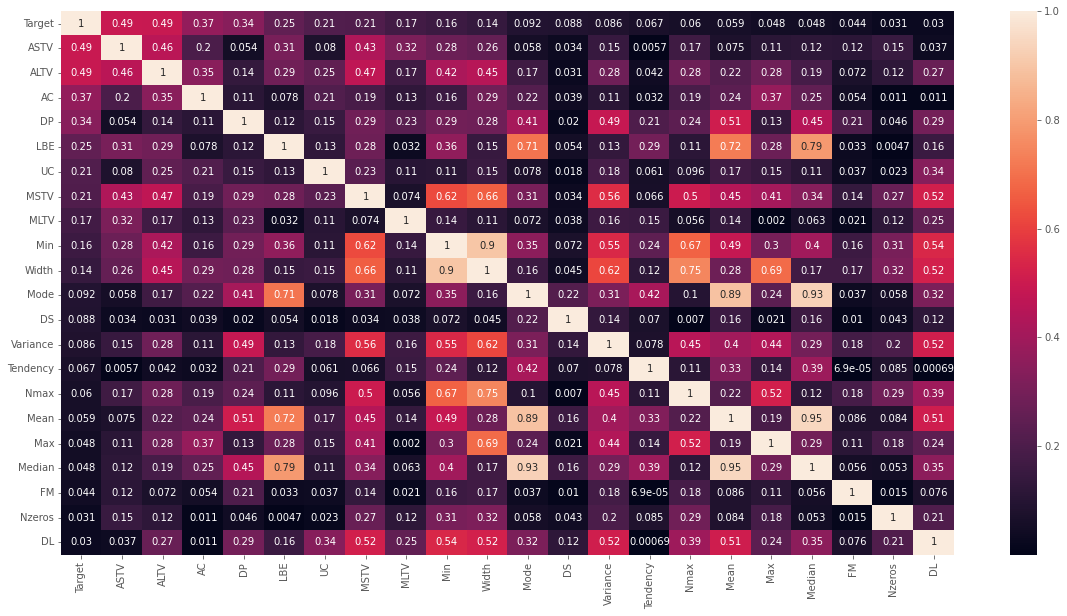

In [ ]:
# Se vuelve a crear un mapa de calor pero con las variables ordenadas, con el fin de ver cuales son utiles y descartar aquellas que hagan ruido, es decir que esten correlacionadas entre ellas 
Target = data.loc[:,['Target', 'ASTV', 'ALTV', 'AC', 'DP', 'LBE', 'UC', 'MSTV', 'MLTV', 'Min', 'Width', 'Mode', 'DS', 'Variance', 'Tendency', 'Nmax', 'Mean', 'Max', 'Median', 'FM', 'Nzeros', 'DL']]
plt.figure(figsize=(20,10))
sns.heatmap(Target.corr().abs(),annot = True)

Observando la matriz de correlacion, se escogeran 3 variables que esten altamente correlacionadas con el Target pero que no esten correlacionadas entre si para no hacer un sobre entrenamiento, las cuales seran ASTV (Cuantitativa continua),AC (Cuantitativa continua) y DP(Cuantitativa discreta),
en este caso como ALTV esta correlacionada con ASTV se descarta para no sobre entrenar el modelo, pero al ser DP diescreta y todas las demas continuas se descartara la misma y se escogera la siguiente,es decir, LBE (Cuantitativa continua)

<Figure size 1440x720 with 0 Axes>

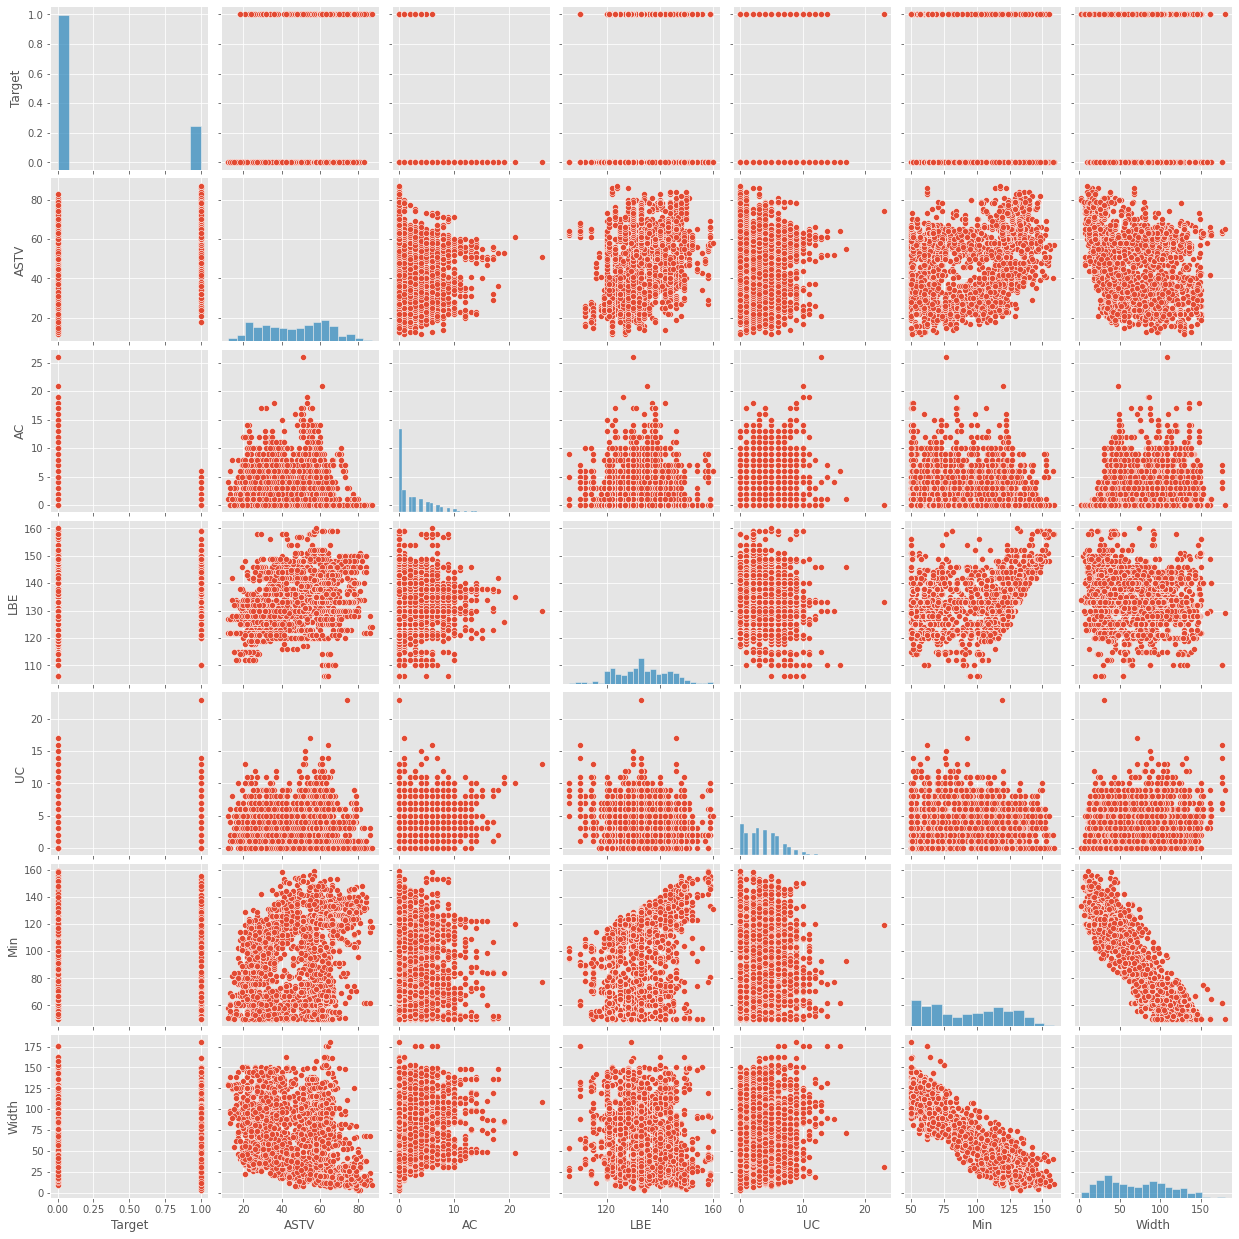

In [ ]:
train = data.loc[:,["Target","ASTV","AC","LBE","UC","Min","Width"]]
plt.figure(figsize=(20,10))
sns.pairplot(train) 

# Relacion univariable del target con las variables explicativas 

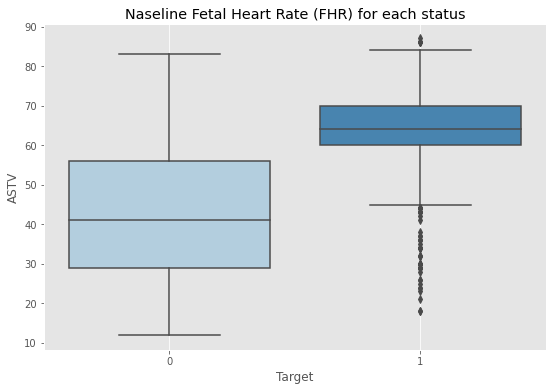

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x = "Target", y = "ASTV", data = data, palette = "Blues")
plt.title("Naseline Fetal Heart Rate (FHR) for each status")
plt.grid()

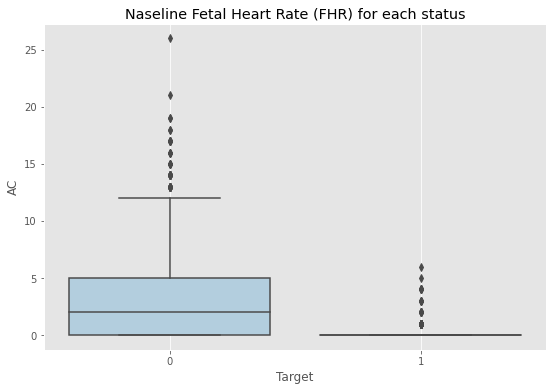

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x = "Target", y = "AC", data = data, palette = "Blues")
plt.title("Naseline Fetal Heart Rate (FHR) for each status")
plt.grid()

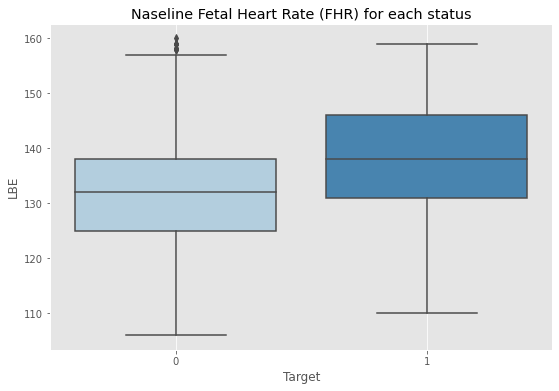

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x = "Target", y = "LBE", data = data, palette = "Blues")
plt.title("Naseline Fetal Heart Rate (FHR) for each status")
plt.grid()

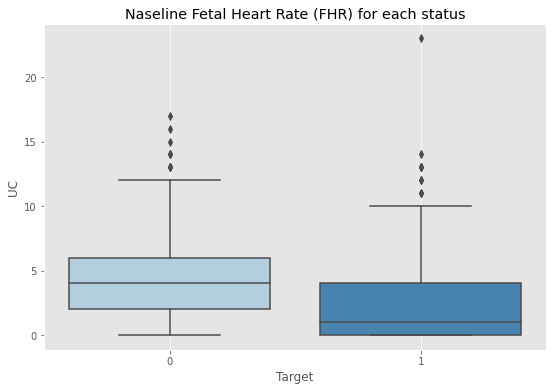

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x = "Target", y = "UC", data = data, palette = "Blues")
plt.title("Naseline Fetal Heart Rate (FHR) for each status")
plt.grid()

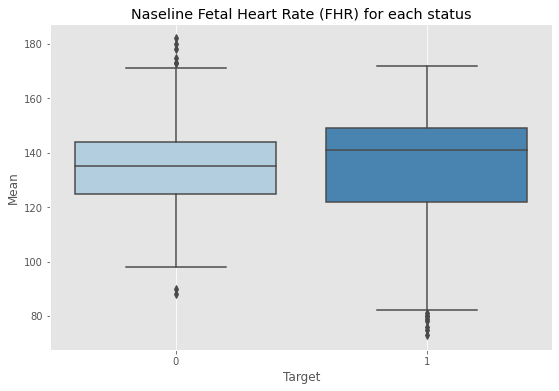

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x = "Target", y = "Mean", data = data, palette = "Blues")
plt.title("Naseline Fetal Heart Rate (FHR) for each status")
plt.grid()

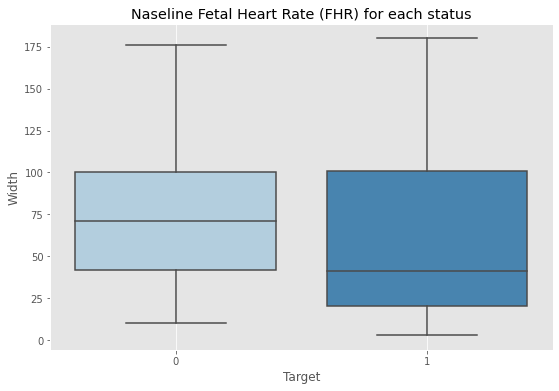

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x = "Target", y = "Width", data = data, palette = "Blues")
plt.title("Naseline Fetal Heart Rate (FHR) for each status")
plt.grid()

# Muestreo
Entrenamiento y test

In [ ]:
x = train.loc[:,train.columns != "Target"]
y = train.loc[:,train.columns == "Target"]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size= 0.40, random_state= 0)

In [ ]:
# Modelizacion
gnb = GaussianNB()
modelNB = gnb.fit(x_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(x_train)
y_pred_test = modelNB.predict_proba(x_test)

# Validacion

In [ ]:
#Curva ROC y AUC para training
fpr_train,tpr_train,_ = roc_curve(y_train, y_pred_train[:,1])
roc_auc_train = auc (fpr_train, tpr_train)
#Curva ROC y AUC para test
fpr_test,tpr_test,_ = roc_curve(y_test, y_pred_test[:,1])
roc_auc_test = auc (fpr_test, tpr_test)

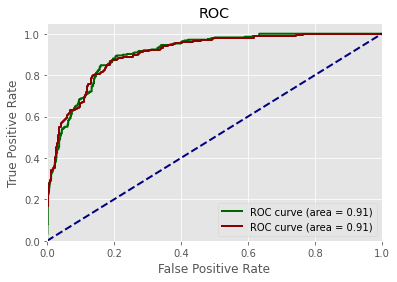

In [ ]:
# Grafica
plt.figure()
lw = 2

plt.plot(fpr_train, tpr_train, color = "darkgreen", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test, tpr_test, color = "darkred", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0,1], [0,1], color = "navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

# SVM

In [ ]:
# Importar archivo desde drive
url='https://drive.google.com/file/d/1_pLgrGHxajA0645dUjNsQS_nBiVrHgVW/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
datadrive = pd.read_csv(dwn_url, sep =";")
data = datadrive.drop(["ID","b","e","DR"], axis = 1)

In [ ]:
vars = ["ASTV","AC","LBE","UC","Min","Width"]
x = data[vars]
y = data.loc[:,data.columns == "Target"]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size= 0.50, random_state= 0)

# Creacion de modelo SVM Lineal

In [ ]:
modelo = SVC(C=10, kernel= "linear", random_state=123)
modelo.fit(x_train, y_train)
SVC(C=10, kernel= "linear", random_state=123)

SVC(C=10, kernel='linear', random_state=123)

In [ ]:
# prediccion test
predicciones_train = modelo.predict(x_train)
predicciones_test = modelo.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_true=y_train, y_pred= predicciones_train, normalize=True)
print('''El accuracy de tarining es:{}%'''.format(100*accuracy))
accuracy = accuracy_score(y_true=y_train, y_pred= predicciones_test, normalize=True)
print('''El accuracy de tarining es:{}%'''.format(100*accuracy))

confusion_Matriz = pd.crosstab(
    y_test.Target.ravel(),
    predicciones_test,
    rownames = ["Real"],
    colnames = ["prediccion"]
)
print(confusion_Matriz)

El accuracy de tarining es:87.30009407337724%
El accuracy de tarining es:66.03951081843839%
prediccion    0    1
Real                
0           773   56
1            82  152


In [ ]:
# Importar archivo desde drive
url='https://drive.google.com/file/d/1_pLgrGHxajA0645dUjNsQS_nBiVrHgVW/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
datadrive = pd.read_csv(dwn_url, sep =";")
data = datadrive.drop(["ID","b","e","DR"], axis = 1)

In [ ]:
vars = ["ASTV","AC","LBE","UC","Min","Width"]
x = data[vars]
y = data.loc[:,data.columns == "Target"]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size= 0.50, random_state= 0)

In [ ]:
svmLineal = svm.SVC(C = 1,
                    kernel = "linear",
                    degree = 1,
                    probability = True)

svmLineal.fit(x_train,y_train)

y_proba_train_svm = svmLineal.predict_proba(x_train)
y_proba_test_svm = svmLineal.predict_proba(x_test)

In [ ]:
# Entrenamiento
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)
# 
# Test
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

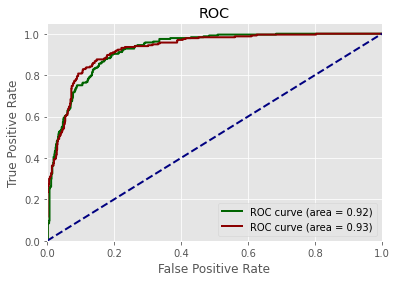

In [ ]:
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()